In [1]:
import xgi
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_theme(style="ticks", context="paper")

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np

from discrete_SIS import *

## Define the hypergraph

In [2]:
N = 500
k1, k2 = 20, 6
H = xgi.uniform_erdos_renyi_hypergraph(n=N, m=2, p=k1, p_type="degree") << xgi.uniform_erdos_renyi_hypergraph(n=N, m=3, p=k2, p_type="degree") 

In [3]:
2*len(H.edges.filterby("size", 2))/N

19.936

In [4]:
3*len(H.edges.filterby("size", 3))/N

5.85

# Define the SIS parameters

In [5]:
lambda1s = np.linspace(0, 2.5, 15)
lambda2s = np.array([0., 0.8, 2.5])
gamma = 0.05 # recovery rate (a.k.a. mu)
num_realisations = 5

beta1s = lambda1s * gamma / k1
beta2s = lambda2s * gamma / k2

## Phase space - MF

In [6]:
res_rho_MF = np.zeros((len(lambda1s), len(lambda2s)))
for l2 in lambda2s:
    for l1 in lambda1s:
        res_rho_MF[lambda1s == l1, lambda2s == l2] = get_rho_MF(l1, l2)

/Users/thomasrobiglio/Dropbox (Politecnico Di Torino Studenti)/Mac (2)/Desktop/mesoscopic_order_parameter/contagion/discrete_SIS.py:222: RuntimeWarning: divide by zero encountered in scalar divide
  rho1 = (l1-1)/l1
/Users/thomasrobiglio/Dropbox (Politecnico Di Torino Studenti)/Mac (2)/Desktop/mesoscopic_order_parameter/contagion/discrete_SIS.py:228: RuntimeWarning: invalid value encountered in sqrt
  rho1 = (l2-l1 + np.sqrt((l1-l2)**2 - 4.*l2*(1-l1)))/(2*l2)


## Phase space - simulation

In [7]:
res_rho = np.zeros((len(beta1s), len(beta2s)))
res_nu = np.zeros((len(beta1s), len(beta2s)))
for beta2 in beta2s:
    for beta1 in beta1s:
        rhos = []
        nus = []
        for _ in range(num_realisations):
            tau = {2: beta1, 3: beta2}
            t1, S1, I1, state_matrix = discrete_SIS_with_states(H, tau, gamma, tmin=0, tmax=500, dt=1, rho=0.2)
            rhos.append(np.average(I1[-50:]))
            nu_avg = np.average([
                np.average([
                    get_nu(i, H, state_matrix[-t])  # Assuming last_state is available here
                    for i in range(N)
                ])
                for t in range(50)
            ])
            nus.append(nu_avg)
        rho = np.average(rhos)/N
        res_rho[beta1s == beta1, beta2s == beta2] = rho
        nu = np.average(nus)
        res_nu[beta1s == beta1, beta2s == beta2] = nu


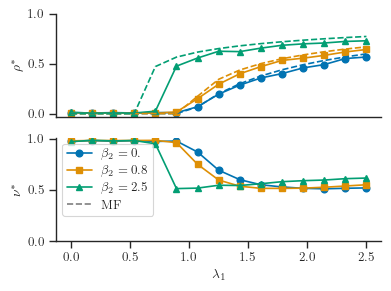

In [19]:
# two plots one for rho and one for nu
fig, axs = plt.subplots(2, 1, figsize=(4, 3))
colors = sb.color_palette("colorblind", 3)

ax = axs[0]
ax.plot(lambda1s, res_rho[:, 0], label=r"$\lambda_2 = 0.$", marker='o', linestyle=None, color=colors[0])
ax.plot(lambda1s, res_rho[:, 1], label=r"$\lambda_2 = 0.8$", marker='s', linestyle=None, color=colors[1])
ax.plot(lambda1s, res_rho[:, 2], label=r"$\lambda_2 = 2.5$", marker='^', linestyle=None, color=colors[2])

ax.plot(lambda1s, res_rho_MF[:, 0], linestyle='--', color=colors[0])
ax.plot(lambda1s, res_rho_MF[:, 1], linestyle='--', color=colors[1])
ax.plot(lambda1s, res_rho_MF[:, 2], linestyle='--', color=colors[2])

ax.set_xticks([])
ax.set_ylabel(r"$\rho^*$")
ax.set_yticks([0, 0.5, 1.0])


ax = axs[1]
ax.plot(lambda1s, res_nu[:, 0], label=r"$\beta_2 = 0.$", marker='o', linestyle=None, color=colors[0])
ax.plot(lambda1s, res_nu[:, 1], label=r"$\beta_2 = 0.8$", marker='s', linestyle=None, color=colors[1])
ax.plot(lambda1s, res_nu[:, 2], label=r"$\beta_2 = 2.5$", marker='^', linestyle=None, color=colors[2])
ax.set_xlabel(r"$\lambda_1$")
ax.set_ylabel(r"$\nu^*$")

ax.plot([],[], linestyle='dashed', color='tab:gray', label='MF')
ax.legend()

ax.set_yticks([0, 0.5, 1.0])


sb.despine()
fig.tight_layout()
fig.savefig("phase_space_nu.png", bbox_inches='tight')
